In [188]:
import ising.data_farm as farm
import matplotlib.pyplot as plt
import numpy as np
from ising.visualize import display_experiment, lattices_to_images,save_gif, upscale_lattices
from ising.lattices import square_random_lattice
from os import listdir
from os.path import isfile, join

In [189]:
lattice = square_random_lattice(200, 200)

In [ ]:
t_low = np.linspace(0.1, 2, 100)
t_transition = np.linspace(2, 3, 100)
t_high = np.linspace(3, 15, 100)

In [190]:
t = np.linspace(0.1, 50, 100)

In [191]:
farm.constant_harvester(lattice=lattice, Ts=t_low, h_J=0, iterations=50, file_id="test")
farm.constant_harvester(lattice=lattice, Ts=t_transition, h_J=0, iterations=50_000, file_id="test")
farm.constant_harvester(lattice=lattice, Ts=t_high, h_J=0, iterations=50, file_id="test")

Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succesfully!
Saved succes

In [1]:
# import shutil
# import os

# if os.path.exists(filename:="simulation-data"):
#     shutil.rmtree(filename)
#     os.makedirs(filename)

In [198]:

def average_upto_index(array: np.array) -> np.array:
    """Returns an array where each element i is equal to the
    average value of the subarray indexed by [:i+1]."""

    return np.cumsum(array) / np.arange(1, len(array) + 1)


def moving_average(array: np.array, n: int):
    """Computes the moving average with window size n of an array,
    note that the first n elements of the returned array are not
    averages of last n values."""

    assert len(array) > n, "Averaging window too large"

    ret = np.cumsum(array, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]

    partial_window = ret[: n - 1] / np.arange(1, n)
    full_window = ret[n - 1 :] / n
    return np.concatenate((partial_window, full_window), axis=0)

import os

def get_magnetization_data(h_J):
    base_path = f"simulation-data/magnetization/h_J={h_J}"

    Ts = [float(f.split("=")[1]) for f in os.listdir(base_path)]

    Ts.sort()

    l = len(Ts)
    avg_magnetizations = np.empty( (l,) )

    for i, T in enumerate(Ts):
        magnetization_dict = farm.load_magnetization_data(h_J=h_J, T=T)
        mags = []
        for key in magnetization_dict.keys():
            array = magnetization_dict[key]["magnetization"]
            # print(array)
            # farm.magnetization_convergence(array, 0, T)
            mags.append(np.average(array))
            # print(mags)

        avg_magnetizations[i] = np.average(mags)
    return Ts, avg_magnetizations


def magnetization_plot(h_J: float):
    """Uses all magnetization data stored in the simulation-data folder
    with the given h_J parameter.
    If no data is available for the parameter value nothing will be returned."""

    import ising.plot_styling

    Ts, magnetization = get_magnetization_data(h_J)
    l, = magnetization.shape

    plt.ylim(-1.1, 1.1)

    plt.plot(Ts, abs(magnetization))

    plt.legend(["Magnetization"])

    plt.ylabel("Magnetization")
    plt.xlabel("T")
    plt.title(f"$h/J={h_J}$")
    
    return plt.gca()

<Axes: title={'center': '$h/J=0$'}, xlabel='T', ylabel='Magnetization'>

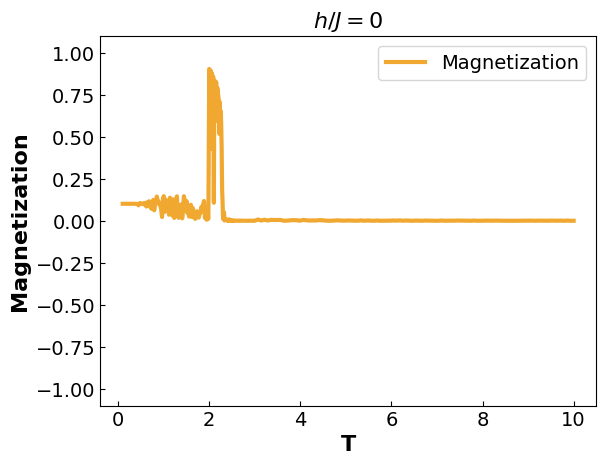

In [199]:
magnetization_plot(0)

In [195]:
# save_lattices_data(np.arange(10),1,1)

In [196]:
# load_lattices_data(1, 1)["a1"]["lattices"]
